<a href="https://colab.research.google.com/github/arvieira/bootcamp_projeto_final/blob/main/notebooks/AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória e Limpeza dos dados:

Os base a ser analisada é composta por dados clínicos de pacientes do Hospital Sírio-Libanes na cidade de São Paulo no Brasil. 
O endereço para acesso é https://www.kaggle.com/S%C3%ADrio-Libanes/covid19.
A base foi obtida no dia 31 de julho de 2021, sendo realizado o *download* e, posteriormente, o envio para este projeto no github.
Ou seja, as análises foram realizadas em um *snapshot* dos dados da data citada.
O uso de dados mais atualizados poderá gerar resultados diferentes.

A base apresenta 231 colunas, sendo a primeirao identificador do paciente e a última se este necessitou da utilização de leito em CTI.
Segundo a descrição presente no site que disponibiliza os dados, cada paciente pode possuir mais de uma entrada na tabela, sendo cada uma pertencente a uma janela temporal (WINDOW).
A janela indicada possui o número de horas desde a admissão do paciente no hospital, sendo separada em janelas de 0 a 2, 2 a 4, 4 a 6, 6 a 12 e acima de 12 horas.
Para os fins de uso dos dados contidos na base, terão de ser levados em consideração esses pontos aqui expostos.

O próprio site da base de dados apresenta uma recomendação dos dados que podem e que não podem ser utilizados para modelagem.
É indicado que as janelas a partir da qual e inclusive que a o paciente foi admitido na CTI não devem ser usadas para modelagem.
Logo, precedendo a criação do modelo, terá de ser feita uma limpeza dos dados para a retirada das linhas referentes a essas entradas.

Seguindo a descrição encontrada no site da base utilizada, há a disponibilidade de 3 campos demográficos, 9 relativos a comorbidades e doenças pré-existentes, 36 oriundas de exames sanguíneos e 6 sobre sinais vitais.
Ou seja, são disponibilizadas 54 campos para a utilização na construção do modelo.
As demais colunas $(231 - 54)$ são compostas por média, mediana, máximo, mínimo, diferença do máximo e mínimo e diferença relativa do máximo e mínimo dividido pela média.
Levando em consideração o processo utilizado na literatura, há a necessidade de descarte de variáveis altamente correlacionadas para não enviesar o modelo.
Nesse caso, sabemos que campos de resumo de dados estarão diretamente correlacionados com os próprios dados.
Por exemplo, se o dado cresce, a média do dado irá crescer junto com ele, mostrando uma alta correlação, uma vez que um é produzido a partir do outro.

Mediante o exposto, para a etapa de limpeza de dados, serão realizadas as seguintes atividades:
- Descartar colunas de resumo de dados.
- Tratar dados faltantes descartando ou preenchendo-os
- Descartar a linha que o paciente foi pra CTI e as seguintes. Levar em consideração os dados anteriores e indicar se aquele paciente foi ou não para CTI na coluna adequada.



In [1]:
# Importações de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importação dos dados
raw_data = pd.read_excel('https://github.com/arvieira/bootcamp_projeto_final/blob/main/data/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')
raw_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [3]:
# Visualização do formato da tabela
raw_data.shape

(1925, 231)

In [4]:
# Listagem inicial de colunas
raw_data.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [5]:
# Descrição dos dados
raw_data.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

In [6]:
# List comprehension para selecionar todas as colunas que contenham resumos de dados
# na base.
columns_mean = [column for column in raw_data.columns if 
          not column.endswith('MEDIAN') 
          and not column.endswith('MAX') 
          and not column.endswith('MIN') 
          and not column.endswith('DIFF') 
          and not column.endswith('DIFF_REL')]

In [7]:
data_without_resume = raw_data[columns_mean]
data_without_resume.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,ABOVE_12,1


In [8]:
# Exibindo o formato da base de dados após a remoção das colunas de resumo de dados
data_without_resume.shape

(1925, 57)

In [9]:
data_without_resume.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,ABOVE_12,1


---
 Com a remoção das colunas de resumos de dados, foram obtidos 57 colunas compostas por 1 coluna de identificação do paciente, 1 coluna de janela, 1 coluna indicativa de CTI e 54 colunas que representam as *features* indicadas na descrição da base de dados.

Nesse momento, será feita a próxima atividade que consiste no tratamento de dados faltantes na base.
Pode-se descartar as linhas com dados faltantes ou preenchê-las com algoritmos de *Backfill* ou *Forwardfill*.
O algoritmo de *Backfill* realiza o preenchimento de dados faltantes levando em consideração o próximo dado presente.
Ou seja, há um preenchimento para trás levando em consideração o primeiro dado disponível após o intervalo faltante.
Quanto ao *Forwardfill*, o processo é feito de maneira contrária, realizando um preenchimento para frente levando em consideração o último dado disponível antes do intervalo faltante.

Levando em consideração as especificações indicadas na descrição dos dados, temos 3 colunas demográficas, 9 colunas de doenças pré-existentes, 36 de resultados sanguíneos e 6 de sinais vitais.
Considerando ainda a disposição dos dados em janelas de horários, é de se ressaltar a possibilidade da constância de dados dentro de um mesmo paciente, de modo que a utilização de preenchimento por *backfill* ou *forwardfill* dentro de um mesmo paciente é perfeitamente aceitável.


---

In [10]:
# As 13 primeiras colunas são campos categóricos
categoric_features_columns = data_without_resume.iloc[:, :13].columns
categoric_features = data_without_resume.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[categoric_features_columns].fillna(method='bfill').fillna(method='ffill')

# Da 13 até a antepenultima são as colunas contínuas que precisamos preencher
# devido à falta de dados. Conforme indicado, é necessário o agrupamento das
# linhas pelo identificador do paciente. Não podemos preencher um paciente com
# os dados de outro.
continuous_feature_columns = data_without_resume.iloc[:, 13:-2].columns
continuous_feature = data_without_resume.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[continuous_feature_columns].fillna(method='bfill').fillna(method='ffill')

# Últimas duas colunas (WINDOW e ICU)
window_and_ICU = data_without_resume.iloc[:, -2:]

# Remontando a base de dados
cleaned_data = pd.concat([categoric_features, continuous_feature, window_and_ICU], ignore_index=True, axis=1)
cleaned_data.columns = data_without_resume.columns

cleaned_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,ABOVE_12,1


In [11]:
# Verificando se todos os dados foram realmente preenchidos sem problemas
cleaned_data.isna().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              0
DISEASE GROUPING 2              0
DISEASE GROUPING 3              0
DISEASE GROUPING 4              0
DISEASE GROUPING 5              0
DISEASE GROUPING 6              0
HTN                             0
IMMUNOCOMPROMISED               0
OTHER                           0
ALBUMIN_MEAN                    0
BE_ARTERIAL_MEAN                0
BE_VENOUS_MEAN                  0
BIC_ARTERIAL_MEAN               0
BIC_VENOUS_MEAN                 0
BILLIRUBIN_MEAN                 0
BLAST_MEAN                      0
CALCIUM_MEAN                    0
CREATININ_MEAN                  0
FFA_MEAN                        0
GGT_MEAN                        0
GLUCOSE_MEAN                    0
HEMATOCRITE_MEAN                0
HEMOGLOBIN_MEAN                 0
INR_MEAN                        0
LACTATE_MEAN                    0
LEUKOCYTES_MEA

In [12]:
# O AGE_PERCENTIL dará problema na criação do meu modelo futuramente porque 
# ele é uma variável categórica representada por uma string e não por um código
# de categoria.
cleaned_data['AGE_PERCENTIL'].unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [13]:
# Guardando dicionário de mapeamento
age_percentil_categories_dict = dict(enumerate(cleaned_data['AGE_PERCENTIL'].astype('category').cat.categories))
age_percentil_categories_dict

{0: '10th',
 1: '20th',
 2: '30th',
 3: '40th',
 4: '50th',
 5: '60th',
 6: '70th',
 7: '80th',
 8: '90th',
 9: 'Above 90th'}

In [14]:
# Realizando a conversão
cleaned_data['AGE_PERCENTIL'] = cleaned_data['AGE_PERCENTIL'].astype('category').cat.codes

---
Seguindo as atividades indicadas no início desta seção, a seguir serão removidas as linhas indicadas como imprestáveis para a criação do modelo.
Esta informação consta na própria descrição da base de dados contida no site do Hospital Sírio-Libanes.

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/Windows1.png" width = 70%>
  <p align="center">Figura 1 - Exemplo de janela que não deve ser utilizada</p>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/arvieira/bootcamp_projeto_final/main/images/Windows2.png" width = 70%>
  <p align="center">Figura 2 - Exemplo ded janelas que não devem ser utilizadas</p>
</p>


---


In [15]:
# Removendo todos os pacientes que já chegam indo pra CTI. Esses pacientes 
# têm todas as janelas com um X vermelho se eu for desenhas a Figura 2 
# correspondente.
to_remove = cleaned_data.query('WINDOW=="0-2" and ICU==1')['PATIENT_VISIT_IDENTIFIER'].values
prepared_data = cleaned_data.query('PATIENT_VISIT_IDENTIFIER not in @to_remove')
prepared_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0-2,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,2-4,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,4-6,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,6-12,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,ABOVE_12,1


In [16]:
# Para compor a base do modelo usaremos todas as janelas antes do paciente ir 
# para CTI. No entanto, iremos considerar o conjunto de janelas como sendo um
# caminho trilhado pelo paciente até a situação de CTI. Será considerado que 
# um paciente pode dar entrada em diferentes momentos dessa trilha, mas cada 
# janela é como um snapshot da mesma.
# Nesse caso, as diferentes janelas de um mesmo paciente serão tratados como 
# snapshots da trilha de um paciente que deverá ser internado em CTI. Observe
# que um novo paciente pode chegar no hospital e ter um quadro semelhante à
# terceira janela de outro paciente e também acabar indo para o CTI.
def prepare_window(rows):
  if(np.any(rows['ICU'])):
    rows = rows.query('ICU != 1')
    rows.loc[:, 'ICU'] = 1
  return rows

ready_data = prepared_data.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)

In [17]:
# A função verify pode ser utilizada para ir variando o identificador do paciente
# e verificando se o conjunto de dados foi tratado da maneira correta.
def verify(id):
  print(prepared_data[prepared_data['PATIENT_VISIT_IDENTIFIER'] == id])
  print(ready_data[ready_data['PATIENT_VISIT_IDENTIFIER'] == id])

# Exemplo para o paciente com id 18
verify(18)

    PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
90                        18            0  ...       0-2    0
91                        18            0  ...       2-4    0
92                        18            0  ...       4-6    1
93                        18            0  ...      6-12    1
94                        18            0  ...  ABOVE_12    1

[5 rows x 57 columns]
                             PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...  WINDOW  ICU
PATIENT_VISIT_IDENTIFIER                                            ...             
18                       90                        18            0  ...     0-2    1
                         91                        18            0  ...     2-4    1

[2 rows x 57 columns]


In [18]:
# Da mesma forma como o AGE_PERCENTIL iria atrapalhar a criação do modelo, o
# campo que identifica a janela também irá. Nesse caso, trataremos o campo 
# WINDOW como uma variável categórica que identifica o momento na evolução do 
# paciente que o snapshot foi retirado. Esse momento será tratado como uma 
# variável categórica numérica. semelhante ao que foi feito com o AGE_PERCENTIL.
window_categories_dict = dict(enumerate(cleaned_data['WINDOW'].astype('category').cat.categories))
ready_data['WINDOW'] = ready_data['WINDOW'].astype('category').cat.codes
window_categories_dict

{0: '0-2', 1: '2-4', 2: '4-6', 3: '6-12', 4: 'ABOVE_12'}

---
Ante o exposto no Capítulo 2 (Referêncial Teórico), trabalhos indicaram determinadas características de dados clínicos e demográficos como influenciando diretamente na evolução do quadro do paciente de COVID-19.
Dentre as *features* que despertaram interesse naqueles trabalho e os resultados, estão:
- Idade: Quanto mais idoso, evoluiria pior.
- Sexo: Masculino evoluiria pior.
- Lactate Dehydrogenase (LDH): Indicador de fibrose pulmonar, comumente encontrado em síndromes respiratórias agudas (SARS)
- D-dimer: Está relacionado a episódios trombóticos dos pacientes.
- Direct Bilirubin: Relacionado à destruição de células vermelhas do sangue ou incapacidade do fígado de filtrar adequadamente.
- Lymphocyte: As células epiteliais do pulmão destruídas induzem uma linfopenia que aumenta esse índice.
- High-sensitive C-reactive protein (hs-CRP): Indicador de uma inflamação persistente.

Isto posto, antes da utilização da base de dados para a criação do modelo de *Machine Learning* para previsão da necessidade de leitos de CTI, os resultados apresentados pelos trabalhos da literatura selecionados serão avaliados com visualizações de dados.
Cabe ressaltar, que somente serão analisadas as *features* que estão na lista acima e se encontram na base do Hospital Sírio-Libanes preparada até então.

---


In [19]:
ready_data.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEAN', 'BE_ARTERIAL_MEAN',
       'BE_VENOUS_MEAN', 'BIC_ARTERIAL_MEAN', 'BIC_VENOUS_MEAN',
       'BILLIRUBIN_MEAN', 'BLAST_MEAN', 'CALCIUM_MEAN', 'CREATININ_MEAN',
       'FFA_MEAN', 'GGT_MEAN', 'GLUCOSE_MEAN', 'HEMATOCRITE_MEAN',
       'HEMOGLOBIN_MEAN', 'INR_MEAN', 'LACTATE_MEAN', 'LEUKOCYTES_MEAN',
       'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN', 'P02_ARTERIAL_MEAN',
       'P02_VENOUS_MEAN', 'PC02_ARTERIAL_MEAN', 'PC02_VENOUS_MEAN', 'PCR_MEAN',
       'PH_ARTERIAL_MEAN', 'PH_VENOUS_MEAN', 'PLATELETS_MEAN',
       'POTASSIUM_MEAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'TGO_MEAN', 'TGP_MEAN', 'TTPA_MEAN', 'UREA_MEAN',
       'DIMER_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOOD

---
Correspondência de colunas:
- Idade = AGE_PERCENTIL
- Sexo = GENDER
- Lactate Dehydrogenase (LDH) está relacionada com LACTATE_MEAN
- D-dimer = DIMER_MEAN
- Direct Bilirubin = BILLIRUBIN_MEAN
- Lymphocyte = LINFOCITOS_MEAN
- hs-CRP = Nenhuma

---


In [20]:
# Essa célula pega a primeira janela de cada paciente, marcando a coluna ICU
# como 1 para aqueles que acabaram evoluindo para CTI e como 0 para aqueles que 
# não necessitaram de tal recurso.
# Em seguida, a base de dados é dividida em duas segundo a necessidade ou não de
# terapia intensiva em CTI.
def filter_first_window(rows):
  if(np.any(rows['ICU'])):
    rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1
  return rows.loc[rows['WINDOW'] == '0-2']


first_window_data = cleaned_data.groupby('PATIENT_VISIT_IDENTIFIER').apply(filter_first_window).reset_index(drop=True)
first_window_ICU_data = first_window_data.query('ICU == 1')
first_window_not_ICU_data = first_window_data.query('ICU == 0')

In [21]:
def filter_last_window(rows):
  if(np.any(rows['ICU'])):
    rows.loc[rows['WINDOW'] == 'ABOVE_12', 'ICU'] = 1
  return rows.loc[rows['WINDOW'] == 'ABOVE_12']

last_window_data = cleaned_data.groupby('PATIENT_VISIT_IDENTIFIER').apply(filter_last_window).reset_index(drop=True)
last_window_ICU_data = last_window_data.query('ICU == 1')
last_window_not_ICU_data = last_window_data.query('ICU == 0')

In [22]:
# Esta célula realiza as definições necessárias para a construção das visualizações
# por faixa etária a seguir.
age_translate_table = {
    '10th': '0 a 10 anos',
    '20th': '11 a 20 anos',
    '30th': '21 a 30 anos',
    '40th': '31 a 40 anos',
    '50th': '41 a 50 anos',
    '60th': '51 a 60 anos',
    '70th': '61 a 70 anos',
    '80th': '71 a 80 anos',
    '90th': '81 a 90 anos',
    'Above 90th': 'Acima de 90 anos',
}

title_font = {
  'size': 22,
  'color': 'black'
}
axis_font = {
  'size': 15,
  'color': 'black'
}

def plot_age_graph(title, xlabel, ylabel, data):
  my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(data))]
  ax = data.plot(kind='bar', figsize=(10, 6), rot=45, color=my_colors)
  ax.set_xticklabels([age_translate_table[age] for age in age_percentil_categories_dict.values()])
  ax.set_ylabel(ylabel, fontdict=axis_font)
  ax.set_xlabel(xlabel, fontdict=axis_font)
  ax.set_title(title, fontdict=title_font)
  plt.show()

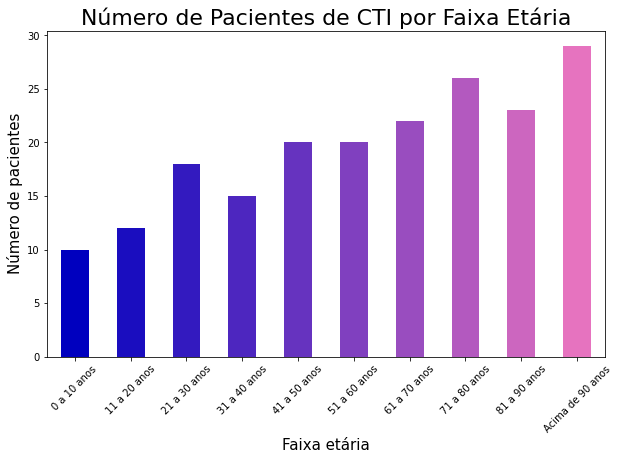

In [23]:
# Visualização de pacientes que necessitaram de CTI por idade
plot_age_graph(title='Número de Pacientes de CTI por Faixa Etária',
               xlabel='Faixa etária',
               ylabel='Número de pacientes',
               data=first_window_ICU_data['AGE_PERCENTIL'].value_counts().sort_index()
               )

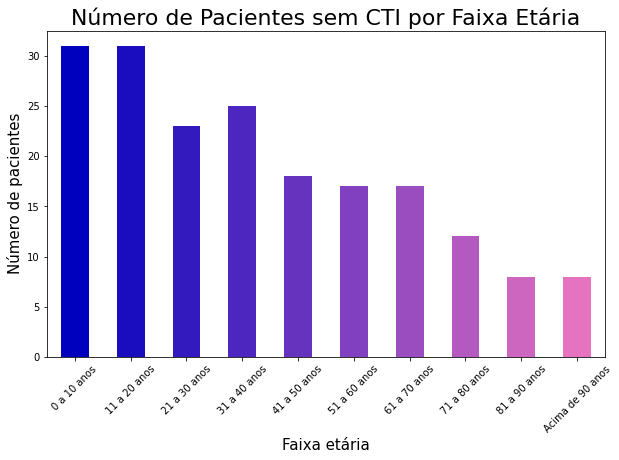

In [24]:
# Visualização de pacientes que não necessitaram de CTI por idade
plot_age_graph(title='Número de Pacientes sem CTI por Faixa Etária',
               xlabel='Faixa etária',
               ylabel='Número de pacientes',
               data=first_window_not_ICU_data['AGE_PERCENTIL'].value_counts().sort_index()
               )

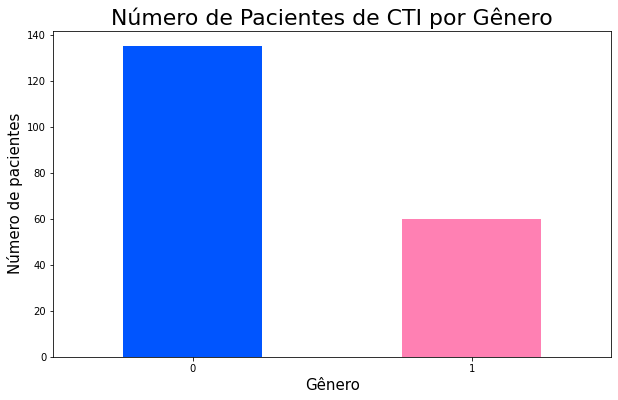

In [25]:
# Pela visualização construída, pode-se identificar que há desbalanceamento entre
# os números de pacientes dos diferentes gêneros que precisaram de atendimento em
# CTI. No entanto, uma vez que os dados estão anonimizados, não se pode afirmar
# qual gênero é representado pelos números zero e um, respectivamente.
ax = first_window_ICU_data['GENDER'].value_counts().plot(kind='bar', color=['#0055ff', '#ff80b3'], rot=0, figsize=(10, 6))
ax.set_ylabel('Número de pacientes', fontdict=axis_font)
ax.set_xlabel('Gênero', fontdict=axis_font)
ax.set_title('Número de Pacientes de CTI por Gênero', fontdict=title_font)
plt.show()

In [26]:
# Essa função foi desenvolvida para realizar a construção de visualizações de 
# features contínuas da base de dados.
def plot_continuous_feature(title, xlabel, ylabel, data, color):
  ax = data.plot(figsize=(10,6), color=[color])
  ax.set_title(title, fontdict=title_font)
  ax.set_xlabel(xlabel, fontdict=axis_font)
  ax.set_ylabel(ylabel, fontdict=axis_font)
  ax.set_xlim((-1.1,1.1))
  plt.show()

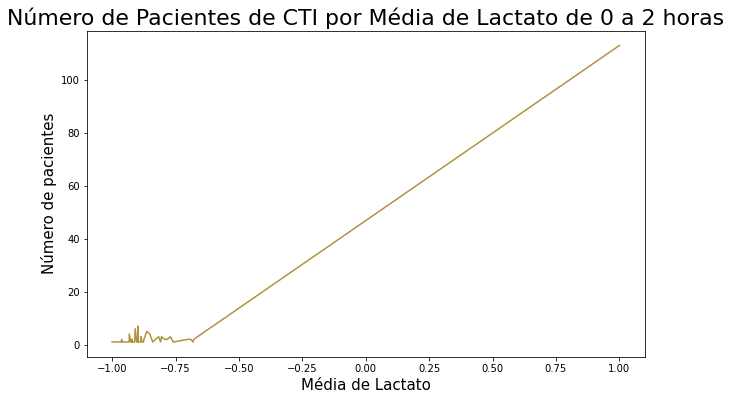

In [27]:
# LDH inicio ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Lactato de 0 a 2 horas', 
    xlabel='Média de Lactato', 
    ylabel='Número de pacientes', 
    data=first_window_ICU_data['LACTATE_MEAN'].value_counts().sort_index(),
    color='#b0923b'
    )

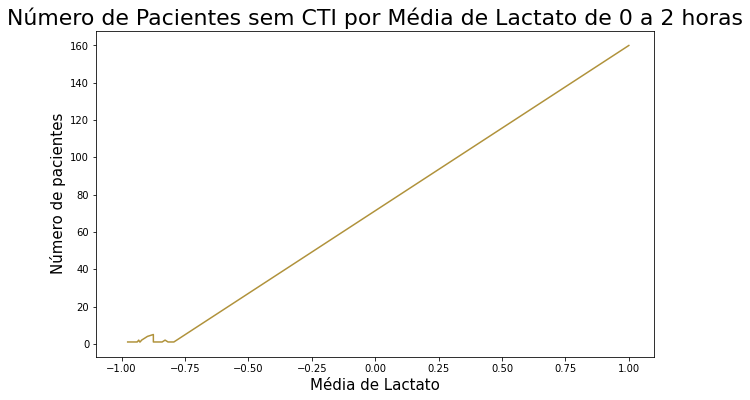

In [28]:
# LDH inicio
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Lactato de 0 a 2 horas', 
    xlabel='Média de Lactato', 
    ylabel='Número de pacientes', 
    data=first_window_not_ICU_data['LACTATE_MEAN'].value_counts().sort_index(),
    color='#b0923b'
    )

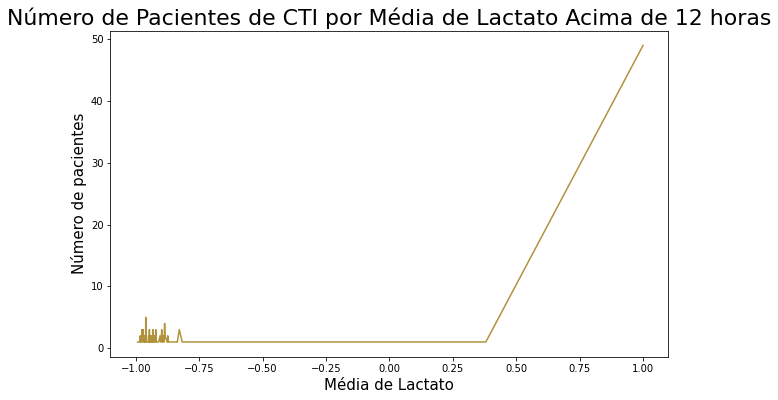

In [29]:
# LDH acima de 12 horas ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Lactato Acima de 12 horas', 
    xlabel='Média de Lactato', 
    ylabel='Número de pacientes', 
    data=last_window_ICU_data['LACTATE_MEAN'].value_counts().sort_index(),
    color='#b0923b'
    )

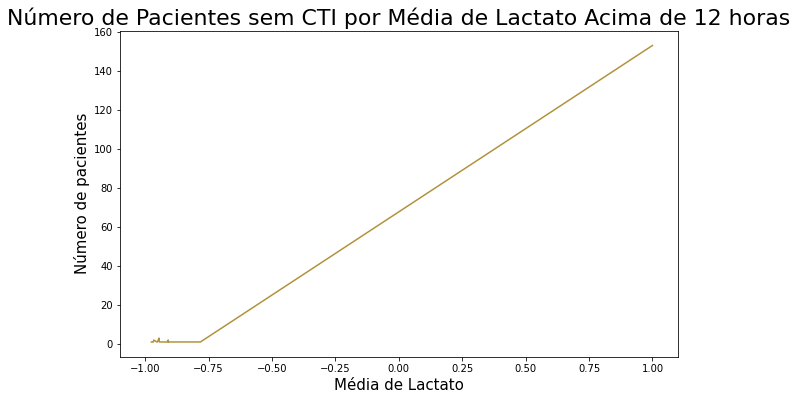

In [30]:
# LDH acima de 12 horas
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Lactato Acima de 12 horas', 
    xlabel='Média de Lactato', 
    ylabel='Número de pacientes', 
    data=last_window_not_ICU_data['LACTATE_MEAN'].value_counts().sort_index(),
    color='#b0923b'
    )

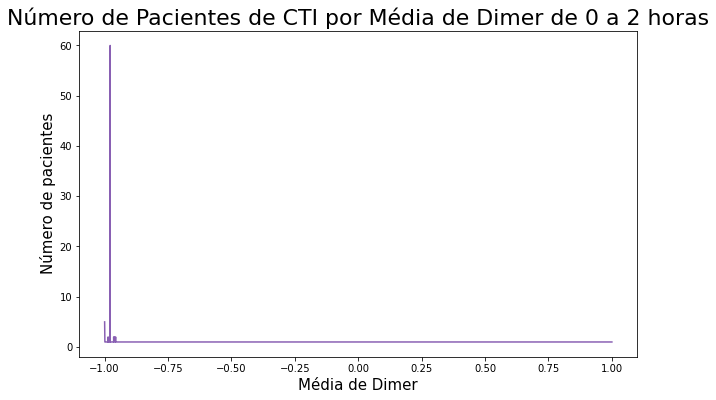

In [47]:
# D-dimer inicio ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Dimer de 0 a 2 horas', 
    xlabel='Média de Dimer', 
    ylabel='Número de pacientes', 
    data=first_window_ICU_data['DIMER_MEAN'].value_counts().sort_index(),
    color='#8960b3'
    )

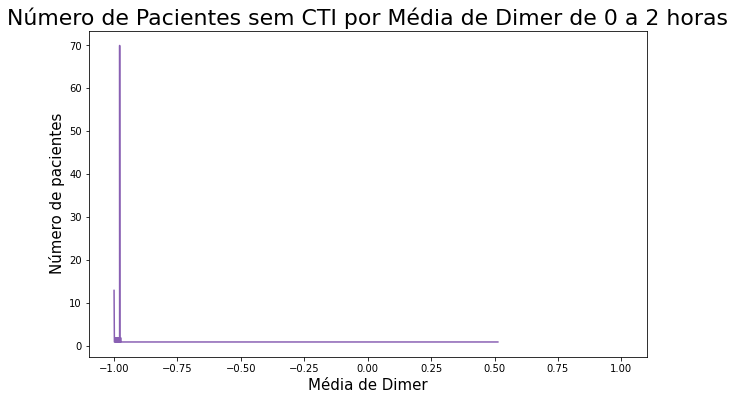

In [48]:
# D-dimer inicio
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Dimer de 0 a 2 horas', 
    xlabel='Média de Dimer', 
    ylabel='Número de pacientes', 
    data=first_window_not_ICU_data['DIMER_MEAN'].value_counts().sort_index(),
    color='#8960b3'
    )

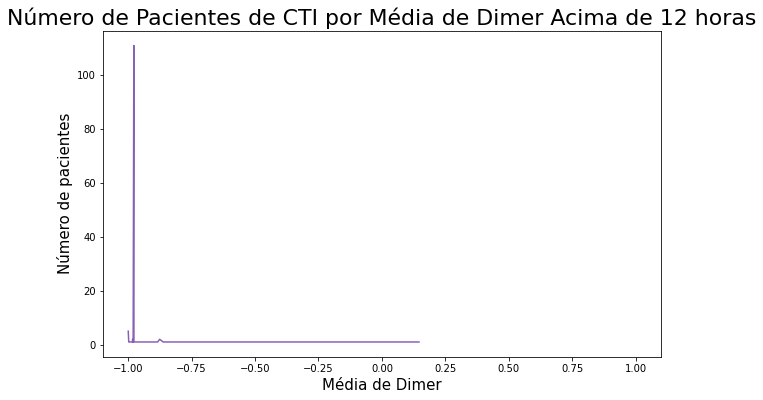

In [49]:
# D-dimer acima de 12 horas ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Dimer Acima de 12 horas', 
    xlabel='Média de Dimer', 
    ylabel='Número de pacientes', 
    data=last_window_ICU_data['DIMER_MEAN'].value_counts().sort_index(),
    color='#8960b3'
    )

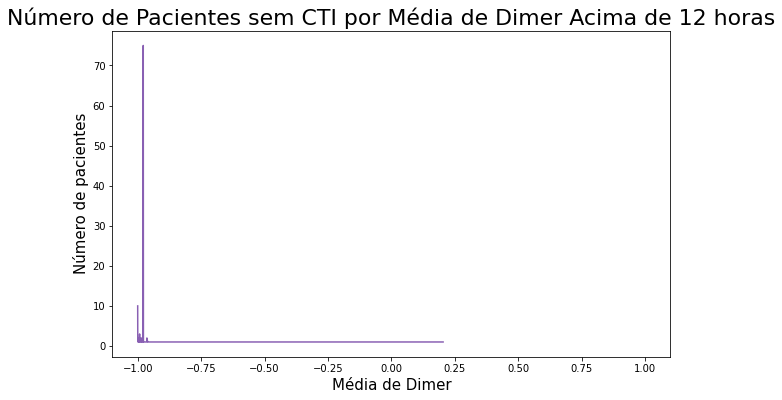

In [50]:
# D-dimer acima de 12 horas
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Dimer Acima de 12 horas', 
    xlabel='Média de Dimer', 
    ylabel='Número de pacientes', 
    data=last_window_not_ICU_data['DIMER_MEAN'].value_counts().sort_index(),
    color='#8960b3'
    )

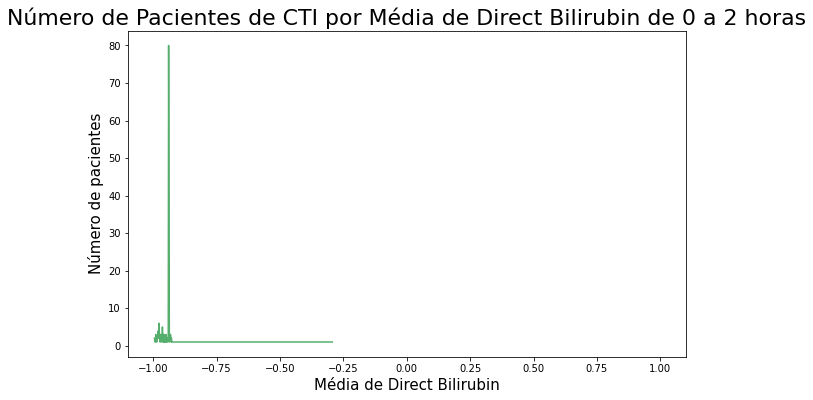

In [35]:
# Direct Bilirubin inicio ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Direct Bilirubin de 0 a 2 horas', 
    xlabel='Média de Direct Bilirubin', 
    ylabel='Número de pacientes', 
    data=first_window_ICU_data['BILLIRUBIN_MEAN'].value_counts().sort_index(),
    color='#56ae6c'
    )

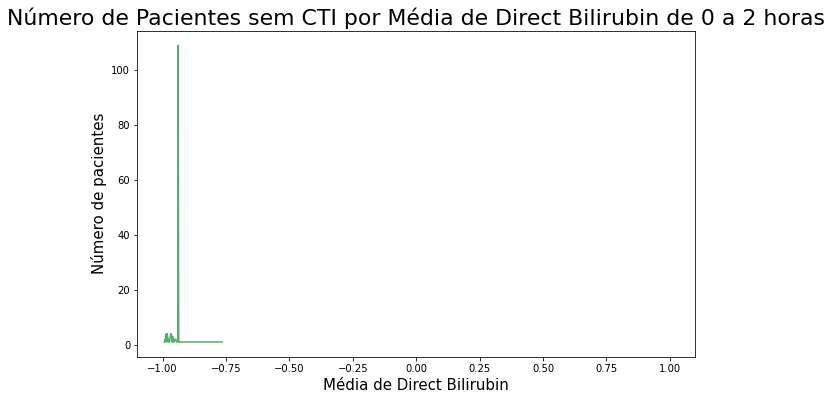

In [36]:
# Direct Bilirubin inicio 
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Direct Bilirubin de 0 a 2 horas', 
    xlabel='Média de Direct Bilirubin', 
    ylabel='Número de pacientes', 
    data=first_window_not_ICU_data['BILLIRUBIN_MEAN'].value_counts().sort_index(),
    color='#56ae6c'
    )

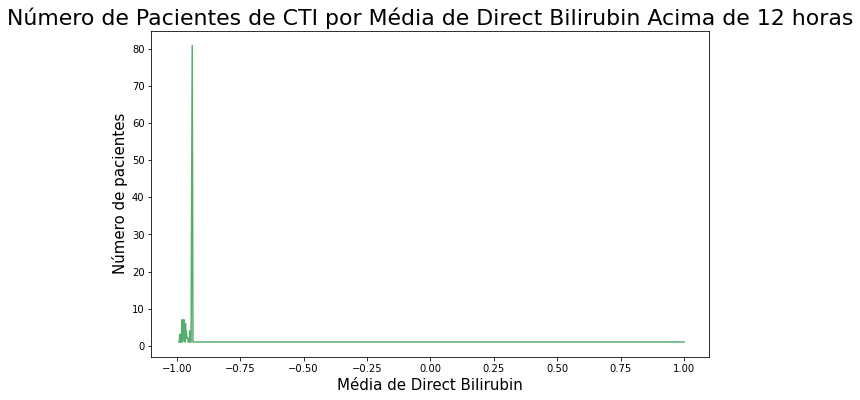

In [37]:
# Direct acima de 12 horas ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Direct Bilirubin Acima de 12 horas', 
    xlabel='Média de Direct Bilirubin', 
    ylabel='Número de pacientes', 
    data=last_window_ICU_data['BILLIRUBIN_MEAN'].value_counts().sort_index(),
    color='#56ae6c'
    )

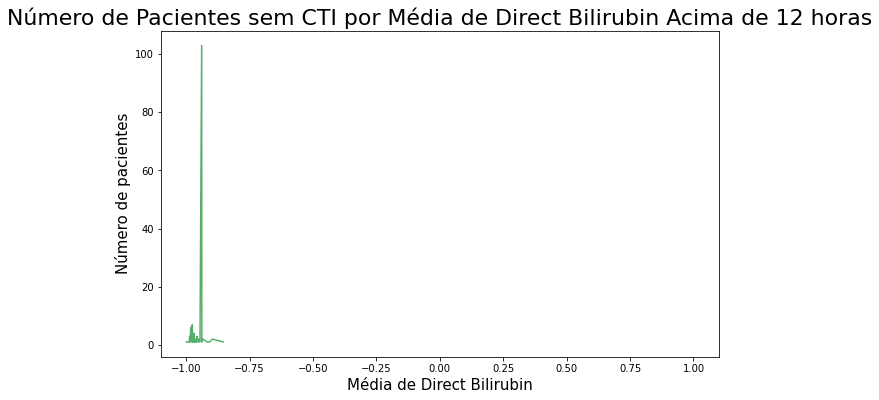

In [38]:
# Direct acima de 12 horas
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Direct Bilirubin Acima de 12 horas', 
    xlabel='Média de Direct Bilirubin', 
    ylabel='Número de pacientes', 
    data=last_window_not_ICU_data['BILLIRUBIN_MEAN'].value_counts().sort_index(),
    color='#56ae6c'
    )

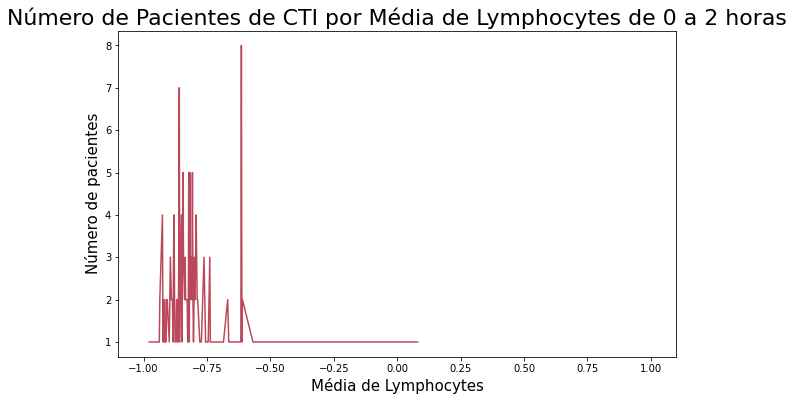

In [39]:
# Lynphocyte inicio ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Lymphocytes de 0 a 2 horas', 
    xlabel='Média de Lymphocytes', 
    ylabel='Número de pacientes', 
    data=first_window_ICU_data['LINFOCITOS_MEAN'].value_counts().sort_index(),
    color='#ba495b'
    )

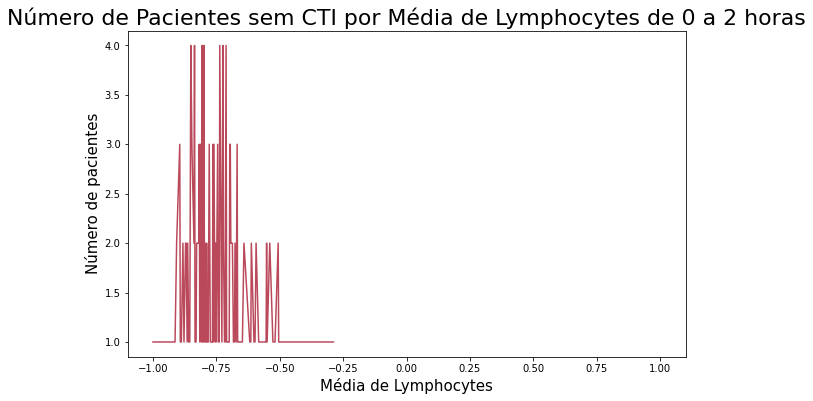

In [40]:
# Lynphocyte inicio
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Lymphocytes de 0 a 2 horas', 
    xlabel='Média de Lymphocytes', 
    ylabel='Número de pacientes', 
    data=first_window_not_ICU_data['LINFOCITOS_MEAN'].value_counts().sort_index(),
    color='#ba495b'
    )

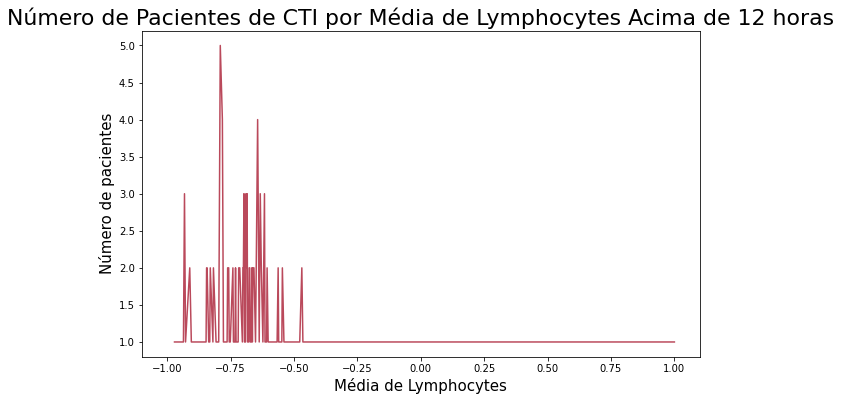

In [41]:
# Lynphocyte acima de 12 horas ICU
plot_continuous_feature(
    title='Número de Pacientes de CTI por Média de Lymphocytes Acima de 12 horas', 
    xlabel='Média de Lymphocytes', 
    ylabel='Número de pacientes', 
    data=last_window_ICU_data['LINFOCITOS_MEAN'].value_counts().sort_index(),
    color='#ba495b'
    )

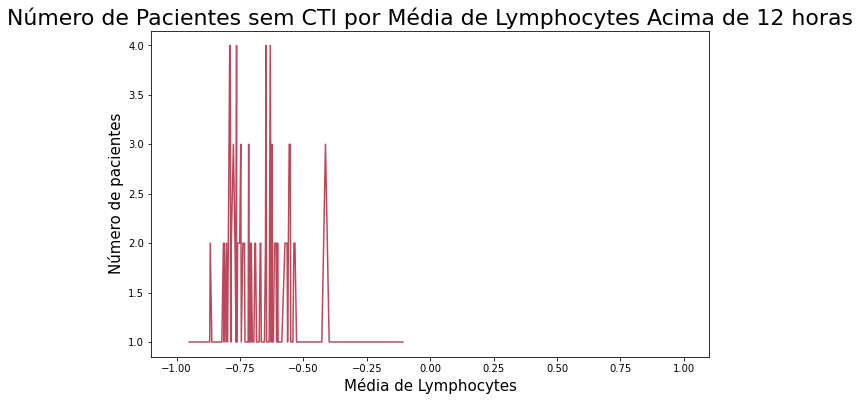

In [42]:
# Lynphocyte acima de 12 horas
plot_continuous_feature(
    title='Número de Pacientes sem CTI por Média de Lymphocytes Acima de 12 horas', 
    xlabel='Média de Lymphocytes', 
    ylabel='Número de pacientes', 
    data=last_window_not_ICU_data['LINFOCITOS_MEAN'].value_counts().sort_index(),
    color='#ba495b'
    )

---
As visualizações anteriores levam em consideração as primeiras 2 horas após admissão de um paciente de COVID-19 e acima de 12 horas. 
Mediante as análises dos gráficos expostos, pode-se inferir que pacientes com idades mais avançadas são realmente mais propícios a evoluir para quadros mais graves, corroborando o indicado pelos trabalhos relacionados.
Quanto ao gênero dos pacientes de COVID-19, um desbalanceamento pode ser identificado nos dados do Hospital Sírio-Libanes.
No entanto, não se pode afirmar se para o gênero masculino ou feminino devido à anonimização dos dados em duas classes de 0 e 1.
Quanto às análises de Lactato, D-dimer, Direct Bilirubin e Lymphocytes não se pode retirar conclusões precisas, uma vez que os índices parecem ser muito sensíveis e a normalização dos dados pode ter feito com que as variações passassem despercebidas.


---




In [43]:
ready_data = ready_data.reset_index(drop=True)
ready_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEAN,BE_ARTERIAL_MEAN,BE_VENOUS_MEAN,BIC_ARTERIAL_MEAN,BIC_VENOUS_MEAN,BILLIRUBIN_MEAN,BLAST_MEAN,CALCIUM_MEAN,CREATININ_MEAN,FFA_MEAN,GGT_MEAN,GLUCOSE_MEAN,HEMATOCRITE_MEAN,HEMOGLOBIN_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PH_ARTERIAL_MEAN,PH_VENOUS_MEAN,PLATELETS_MEAN,POTASSIUM_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,TGO_MEAN,TGP_MEAN,TTPA_MEAN,UREA_MEAN,DIMER_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0,1
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,1,1
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,2,1
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,-0.107143,0.736842,3,1
4,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.779310,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,0,1


In [44]:
# Por fim, antes de seguir à etapa de criação do modelo, vamos retirar possíveis
# features que ainda possam ter uma correlação alta com outras.

# Definindo 0.95 como uma correlação alta
alta_corr = 0.95

# Calculando a matriz de correlação dos dados em valores absolutos
matriz_corr = ready_data.iloc[:, 4:-2].corr().abs()

# Definindo uma matriz com 1s na parte superior. Será utilizada para não remover
# o par features que possuem correlação alta. Nesse caso, irá remover apenas uma
# das duas, mantendo a outra.
matriz_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))

# Features que devem ser excluídas
excluir = [coluna for coluna in matriz_superior.columns if any(matriz_superior[coluna] > alta_corr)]
excluir

['HEMOGLOBIN_MEAN']

In [45]:
# Excluindo feature que tinha alta correlação
ready_data = ready_data.drop(excluir, axis=1)

In [46]:
# Escrevendo os dados em disco para a utilização no próximo notebook
ready_data.to_csv('/content/drive/MyDrive/Trabalho/CienciaDeDados/Bootcamp/Modulo05/ProjetoFinal/data/ready_data.csv')